<big>**Практикум 2.5 Приближенное решение дифференциальных уравнений**</big>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

**Упражнение 1. Найти приближенное решение уравнения <big>$y'=f(x,y)$</big>, удовлетворяющего начальному условию <big>$y(x_0)=y_0$</big>, на отрезке <big>$[a,b] (a=x_0)$</big> методом ломаных Эйлера с заданной точностью <big>$ε$</big> .**

**<big>$y_n = y_{n-1} + f(x_{n-1}, y_{n-1})(x_n-x_{n-1})$</big>**

In [10]:
# получение значений ординат, соответствующих значениям абсцисс
def getArrayY(deltaArr, f, x0, y0):
    y = [y0]
    for i in range(1, len(deltaArr)):
        y.append(y0 + f(x0, y0) * (deltaArr[i] - deltaArr[i - 1]))
        x0 = deltaArr[i]
        y0 = y0 + f(x0, y0) * (deltaArr[i] - deltaArr[i - 1])
    return y

# проверка выполнимости условия точности
def checkEpsilon(f, deltaArr, deltaArr2, a, b, x0_point, y0_point, epsilon):
    y1 = getArrayY(deltaArr, f, x0_point, y0_point)
    y2 = getArrayY(deltaArr2, f, x0_point, y0_point)

    for i in range(len(deltaArr2)):
        if deltaArr2[i] in deltaArr:
            if abs(y2[i] - y1[deltaArr.index(deltaArr2[i])]) > epsilon:
                return False
    return True

def solveEiler(f, x0, y0, a, b, n0, epsilon):
    deltaArr = [a + i * (b - a) / n0 for i in range(n0 + 1)]
    deltaArr2 = [a + i * (b - a) / 2 / n0 for i in range(2 * n0 + 1)]

    n = n0
    while not checkEpsilon(f, deltaArr, deltaArr2, a, b, x0, y0, epsilon):
        n = n * 2
        deltaArr = [a + i * (b - a) / n for i in range(n + 1)]
        deltaArr2 = [a + i * (b - a) / 2 / n for i in range(2 * n + 1)]

    plt.figure(figsize=(10, 10))
    
    # построение ломаной с числом звеньев n0
    plotArrX = [a + i * (b - a) / n0 for i in range(n0 + 1)]
    plotArrY = getArrayY(plotArrX, f, x0, y0)
    plt.plot(plotArrX, plotArrY, "b:")

    # построение ломаной с числом звеньев 2n0
    plotArrX = [a + i * (b - a) / 2 / n0 for i in range(2 * n0 + 1)]
    plotArrY = getArrayY(plotArrX, f, x0, y0)
    plt.plot(plotArrX, plotArrY, "r:")

    # построение ломаной с числом звеньев n
    plotArrX = deltaArr2
    plotArrY = getArrayY(plotArrX, f, x0, y0)
    plt.plot(plotArrX, plotArrY, "g")

    # параметры координатной плоскости
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.grid()
    plt.title(r"Метод ломаных Эйлера", fontdict={"fontsize": 20}, pad=20)

    plt.show()

**Для тестирования функции из п.1 используйте решение уравнения <big>$y'=xy$</big> с начальным условием <big>$y(0)=1$</big> на отрезке <big>$[0,1]$</big> с точностью <big>$ε = 0.001$</big>.**

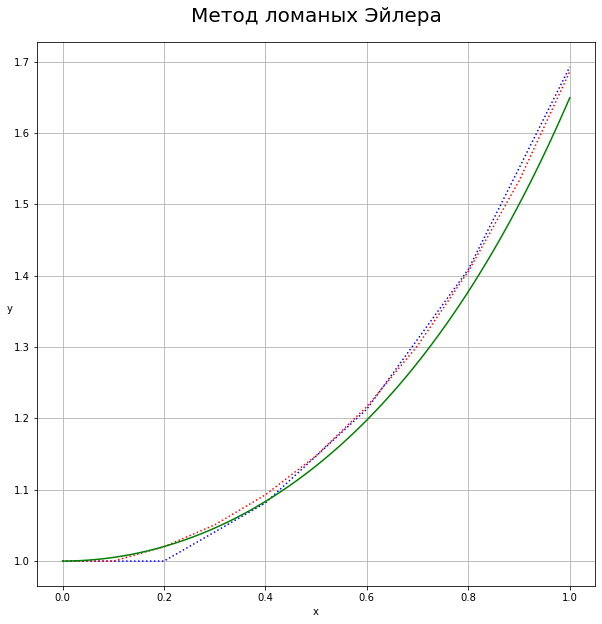

In [14]:
def f(x, y):
    return x * y

solveEiler(f, 0, 1, 0, 1, 5, 0.001)

**Упражнение 2. Найти приближенное решение уравнения <big>$y'=f(x,y)$</big>, удовлетворяющего начальному условию <big>$y(x_0)=y_0$</big>, методом последовательных приближений Пикара.**

**<big>$y_n = y_0 + \int_{x_0}^{x} f(x, y_{n-1}) \,dx$</big>**

In [12]:
# построение графика итерации
def plotPikar(a, b, y_0, color):
    x_plt = np.linspace(a, b, 100)
    y_plt = []

    for i in range(len(x_plt)):
        y_plt.append(y_0.subs(x, x_plt[i]))
    plt.plot(x_plt, y_plt, color)

def solvePikar(f, x, y, x0, y0, a, b, n):
    
    plt.figure(figsize=(10, 10))
    
    # выражение первой итерации
    y_0 = y0
    for i in range(1):
        y_local = y0 + sp.integrate(f(x, y_0), (x, x0, x))
        y_0 = y_local
    plotPikar(a, b, y_0, "b:")

    # выражение второй итерации
    y_0 = y0
    for i in range(2):
        y_local = y0 + sp.integrate(f(x, y_0), (x, x0, x))
        y_0 = y_local
    plotPikar(a, b, y_0, "r:")

    # выражение n итерации
    y_0 = y0
    for i in range(n):
        y_local = y0 + sp.integrate(f(x, y_0), (x, x0, x))
        y_0 = y_local
    plotPikar(a, b, y_0, "g")

    # параметры координатной плоскости
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.grid()
    plt.title(r"Метод последовательных приближений Пикара", fontdict={"fontsize": 20}, pad=20)
    
    plt.show()

**Для тестирования функции из п.1 используйте решение уравнения <big>$y'=xy$</big> с начальным условием <big>$y(0)=1$</big> на отрезке <big>$[0,1]$</big>.**

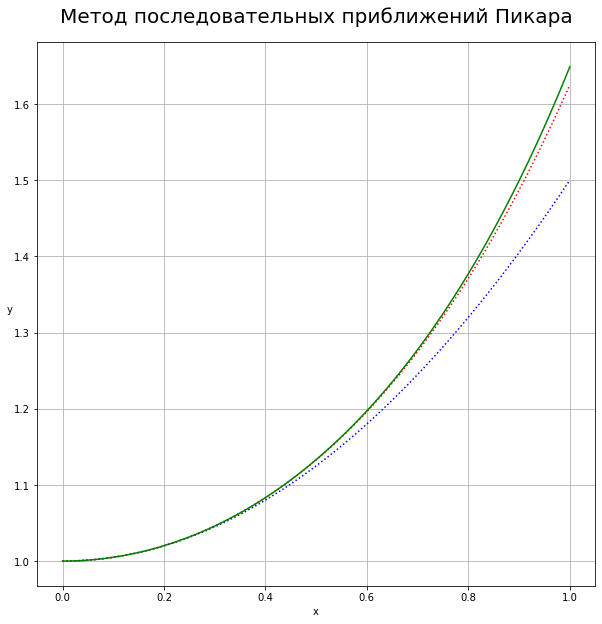

In [16]:
def f(x, y):
    return x * y


x = sp.Symbol("x")
y = sp.Symbol("y")
solvePikar(f, x, y, 0, 1, 0, 1, 10)